In [46]:
!pip install econml
!pip install causalml
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from econml.metalearners import TLearner
import matplotlib.pyplot as plt
import japanize_matplotlib
from causalml.inference.meta import XGBTRegressor,MLPTRegressor

In [47]:
# データの読み込み
df = pd.read_csv("./SSDSE-A-2023.csv", encoding="cp932", header=2)


In [48]:
#data = df[['地方税（市町村財政）'] + ['農家数（自給的農家）'] + ['出生数']].copy()
_T=df['地方税（市町村財政）']
x=df['農家数（自給的農家）']
y=df['出生数']

In [49]:
T = _T.apply(lambda x: 1 if x > _T.mean() else 0)
T

0       1
1       1
2       1
3       1
4       1
       ..
1736    0
1737    0
1738    0
1739    0
1740    0
Name: 地方税（市町村財政）, Length: 1741, dtype: int64

In [65]:
models = RandomForestRegressor(max_depth=3, random_state=0)
T_learner = TLearner(models=models)
X_2d = x.values.reshape(-1, 1)
T_learner.fit(T,y,X=X_2d)

# 効果の推定
tau = T_learner.effect(X_2d)

ValueError: could not convert string to float: 'R01100'

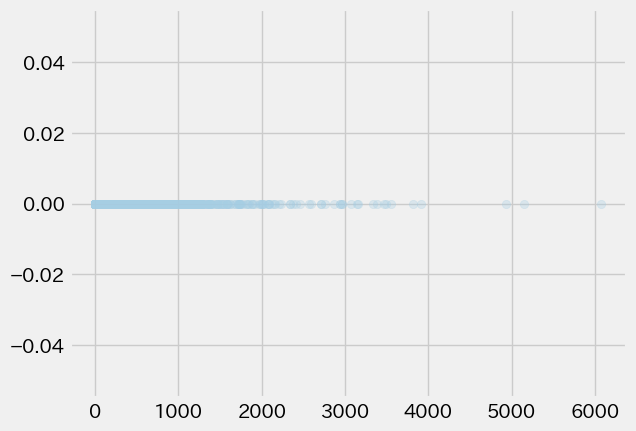

In [63]:
plt.scatter(df["農家数（自給的農家）"], tau, alpha=0.3)
#plt.ylim(0, 400)
#plt.xlim(0, 400)
plt.show()

In [64]:
tau

array([0., 0., 0., ..., 0., 0., 0.])